In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os 
data = np.loadtxt('C:\Users\IsaacHolmes\Desktop\pfm.txt')
X = data[:,0:29]
y = data[:,30]


In [31]:
import matplotlib.pyplot as plt                 #加载matplotlib用于数据的可视化
from sklearn.decomposition import PCA  #加载PCA算法包
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import io as spio

scaler = StandardScaler()
scaler.fit(X)
x_train = scaler.transform(X)
pca=PCA(n_components=25)     #加载PCA算法，设置降维后主成分数目为2
reduced_x=pca.fit_transform(x_train)#对样本进行降维
reduced_x

array([[-7.02751288e-01,  4.70915923e-01, -5.12852896e-01, ...,
        -1.61503162e-01, -1.02096152e+00,  2.56660528e-01],
       [ 1.95670849e+00, -8.75945418e-02,  1.86775419e+00, ...,
        -5.11243845e-01, -3.45638703e-01,  6.76194346e-01],
       [-5.04962732e-01,  3.40577022e+00, -8.40089614e-01, ...,
         5.71734283e-01, -5.21813050e-01, -2.34218955e-01],
       ...,
       [ 1.51497523e-01,  2.42353492e+00,  7.48726168e-01, ...,
         4.81444991e-01,  1.15727607e+00, -1.24817092e-01],
       [-9.59154960e-01,  2.23000077e-01,  1.52361742e+00, ...,
        -3.82067566e-01, -6.77662654e-01,  6.76284726e-01],
       [-1.80768321e+00, -4.61478765e-01,  5.25645913e-01, ...,
         3.09858498e-01,  1.17936875e-03,  3.30940486e-01]])

In [57]:
class Perceptron(object):
    """
    Parameters
    ------------
    eta : float
        学习率 (between 0.0 and 1.0)
    n_iter : int
        迭代次数
    Attributes
    -----------
    w_ : 1d-array
        权重
    errors_ : list
        误差
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [58]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(reduced_x, y)

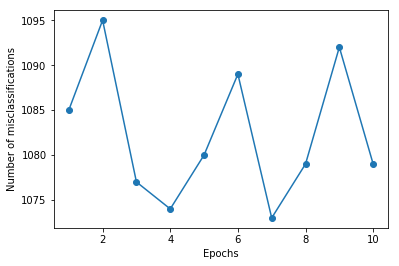

In [59]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()